## 데이터 정리

In [210]:
import re, json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
"""
id: user id
date_account_created: the date of account creation
timestamp_first_active: timestamp of the first activity
date_first_booking: date of first booking
gender
age
signup_method: method taken during signup
signup_flow: the page a user came to signup up from
language: international language preference
affiliate_channel: what kind of paid marketing
affiliate_provider: where the marketing is e.g. google, craigslist, other
first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
signup_app
first_device_type
first_browser
country_destination: this is the target variable you are to predict
"""

In [211]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [212]:
PATH = "/gdrive/MyDrive/01. Programming/2021 데청캠/Kaggle 실습/airbnb-recruiting-new-user-bookings/"

In [213]:
# AGE_GENDER = 'age_gender_bkts.csv'
# COUNTRIY = 'countries.csv'
# SESSIONS = 'sessions.csv'

TRAIN_USERS = 'train_users_2.csv'
# TEST_USERS = 'test_users.csv'

# SAMPLE = 'sample_submission_NDF.csv'

In [214]:
train_df = pd.read_csv(PATH + TRAIN_USERS)

### 결과 값

In [215]:
train_df = train_df[~train_df['country_destination'].isnull()]
print("정답(country_destination)의 속성 값 종류 : ", train_df.country_destination.unique())

정답(country_destination)의 속성 값 종류 :  ['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


### [1] AGE 데이터 전처리

In [216]:
# 이상치 -> NAN
train_df.loc[~train_df['age'].between(18, 100), 'age'] = np.nan
# test_df.loc[~test_df['age'].between(18, 100), 'age'] = np.nan

In [217]:
# NAN -> 평균 값
train_df.loc[train_df['age'].isnull(), 'age'] = train_df.age.mean()

In [218]:
len(train_df[train_df['age'].isnull()])

0

### [2] GENDER

In [219]:
print("train gender의 속성 값 종류 : ", train_df.gender.unique())

train gender의 속성 값 종류 :  ['-unknown-' 'MALE' 'FEMALE' 'OTHER']


* other -> unknown
* unknown -> nan
* other, unknow -> nan
* other, unknow -> int

In [220]:
train_df.loc[train_df['gender'] == 'OTHER', 'gender'] = '-unknown-'

In [221]:
print("train gender의 속성 값 종류 : ", train_df.gender.unique())

train gender의 속성 값 종류 :  ['-unknown-' 'MALE' 'FEMALE']


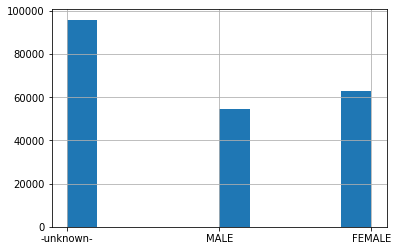

In [222]:
train_df["gender"].hist()

### date_account_created, timestamp_first_active, date_first_booking 날짜 형식으로 변경

In [223]:
train_df = train_df.drop('date_account_created', axis=1)

In [224]:
train_df.head()

,id,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,20090319043255,NaN,-unknown-,36.575619,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


* date_first_booking => drop


In [225]:
train_df.loc[train_df["date_first_booking"].isnull(), 'date_first_booking'] = 0
train_df.loc[train_df["date_first_booking"] != 0, 'date_first_booking'] = 1

In [226]:
train_df.head()

,id,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,20090319043255,0,-unknown-,36.575619,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,20090523174809,0,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,20090609231247,1,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,20091031060129,1,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,20091208061105,1,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Language

In [227]:
train_df.loc[train_df["language"] == 'en', 'language'] = 1
train_df.loc[train_df["language"] != 'en', 'language'] = 0

### first_affiliate_tracked

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


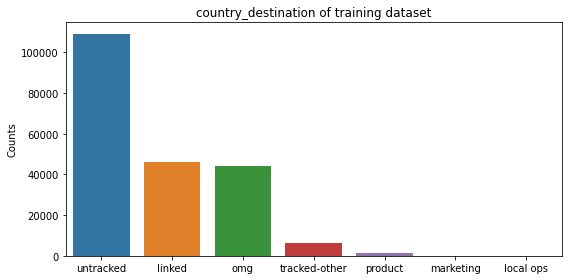

In [228]:
feat_train = train_df['first_affiliate_tracked'].value_counts()
fig = plt.figure(figsize=(8,4))
sns.barplot(feat_train.index.values, feat_train.values)
plt.title('country_destination of training dataset')
plt.ylabel('Counts')
plt.tight_layout()

In [229]:
train_df['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

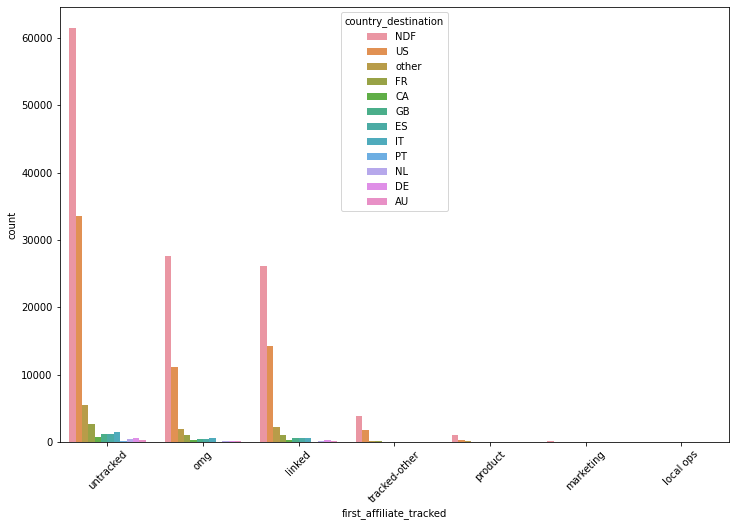

In [230]:
plt.figure(figsize=(12, 8))
sns.countplot(x=train_df['first_affiliate_tracked'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

In [231]:
train_df['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [232]:
len(train_df[train_df['first_affiliate_tracked'].isnull()])

6065

In [233]:
# nan -> untracked
train_df.loc[train_df["first_affiliate_tracked"].isnull(), 'first_affiliate_tracked'] = 'untracked'

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

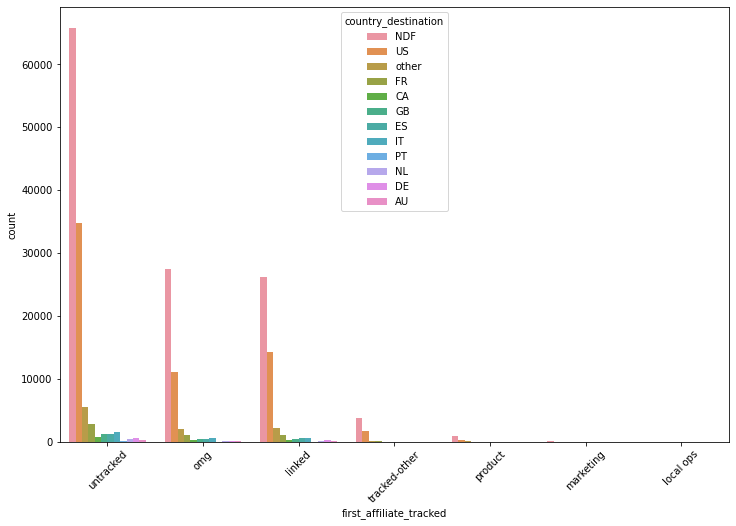

In [234]:
plt.figure(figsize=(12, 8))
sns.countplot(x=train_df['first_affiliate_tracked'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

In [235]:
train_df.isnull().sum()

id                         0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [236]:
train_df.head()

,id,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,20090319043255,0,-unknown-,36.575619,facebook,0,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,20090523174809,0,MALE,38.000000,facebook,0,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,20090609231247,1,FEMALE,56.000000,basic,3,0,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,20091031060129,1,FEMALE,42.000000,facebook,0,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,20091208061105,1,-unknown-,41.000000,basic,0,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [237]:
X, y = train_df.drop(columns=['country_destination', 'id'], axis=1), train_df["country_destination"]

In [238]:
print(len(train_df))

213451


### **One-hot-encoding & Modeling**

In [239]:
X_train

,timestamp_first_active,date_first_booking,age,gender_-unknown-,gender_FEMALE,gender_MALE,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_0,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,...,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
152896,20140214170834,1,33.000000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114145,20131004050733,0,31.000000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131989,20131212171413,0,33.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2232,20101029224022,1,63.000000,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6944,20110727020943,1,33.000000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15110,20120111174311,0,36.575619,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
137804,20140103205047,1,36.575619,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
97447,20130807211302,0,27.000000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39875,20120907015104,0,36.575619,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [240]:
#One-hot-encoding features
cat_features = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in cat_features:
    data_dummy = pd.get_dummies(X[f], prefix=f) # encode categorical variables
    X.drop([f], axis=1, inplace = True) # drop encoded variables
    X = pd.concat((X, data_dummy), axis=1) # concat numerical and categorical variables

X

,timestamp_first_active,date_first_booking,age,gender_-unknown-,gender_FEMALE,gender_MALE,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_0,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,...,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,20090319043255,0,36.575619,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20090523174809,0,38.000000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20090609231247,1,56.000000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20091031060129,1,42.000000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20091208061105,1,41.000000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,20140630235636,0,32.000000,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
213447,20140630235719,0,36.575619,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213448,20140630235754,0,32.000000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213449,20140630235822,0,36.575619,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [243]:
from sklearn.model_selection import train_test_split # 데이터 셋 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [244]:
X_train['date_first_booking'] = X_train['date_first_booking'].astype(int)
X_train['timestamp_first_active'] = X_train['timestamp_first_active'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [245]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)                  
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [247]:
X_test['date_first_booking'] = X_test['date_first_booking'].astype(int)
X_test['timestamp_first_active'] = X_test['timestamp_first_active'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [248]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = xgb.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       212
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00      1005
           5       0.00      0.00      0.00       465
           6       0.00      0.00      0.00       567
           7       1.00      1.00      1.00     24909
           8       0.00      0.00      0.00       152
           9       0.00      0.00      0.00        43
          10       0.70      1.00      0.82     12475
          11       0.00      0.00      0.00      2019

    accuracy                           0.88     42691
   macro avg       0.14      0.17      0.15     42691
weighted avg       0.79      0.88      0.82     42691



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
